In [2]:
from numpy import *
import operator

In [3]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [38]:
def classify0(inx, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inx,(dataSetSize,1))-dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    sortedClassCount=sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
    

In [15]:
group,labels=createDataSet()

In [19]:
classify0([0,0],group,labels,3)

'B'

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [5]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())
    returnMat = zeros ((numberOfLines,3))
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat,classLabelVector

Object `numpy.int` not found.


In [13]:
datingDataMat,datingLabels = file2matrix('datingTestSet.txt')

In [24]:
inx = datingDataMat[0,:]
dataSetSize = datingDataMat.shape[0]
tile(inx,(dataSetSize,1)).shape

(1000L, 3L)

In [39]:
datingLabels

['largeDoses',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'didntLike',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'smallDoses',
 'largeDoses',
 'smallDoses',
 'didntLike',
 'smallDoses',
 'largeDoses',
 'smallDoses',
 'largeDoses',
 'smallDoses',
 'largeDoses',
 'smallDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'smallDoses',
 'didntLike',
 'didntLike',
 'smallDoses',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'smallDoses',
 'largeDoses',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'smallDoses',
 'smallDoses',
 'didntLike',
 'largeDoses',
 'smallDoses',
 'smallDoses',
 'smallDoses',
 'smallDoses',
 'largeDoses',
 'didntLike',
 'smallDoses',
 'didntLike',
 'smallDoses',
 'smallDoses',
 'smallDoses',
 'smallDoses',
 'smallDoses',
 'largeDoses',
 'smallDoses',
 'larg

In [30]:
import matplotlib
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

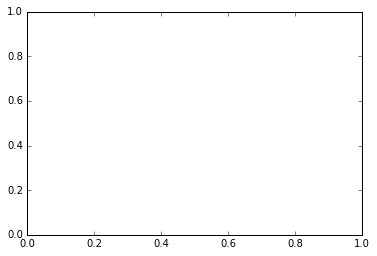

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2)


In [6]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [52]:
normMat,ranges,minVals=autoNorm(datingDataMat)

In [53]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [42]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print "the classifier came back with: %s, the real answer is: %s" % (classifierResult,datingLabels[i])
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print "the total error rate is: %f" % (errorCount/float(numTestVecs))

In [43]:
datingClassTest()

the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real a

In [46]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j]=int(lineStr[j])
    return returnVect

In [52]:
testVector = img2vector('testDigits/0_13.txt')
testVector[0,0:31]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [53]:
from os import listdir

In [64]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s'%fileNameStr)
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s'%fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        if (classifierResult != classNumStr): 
            errorCount += 1.0
    print "\nthe totoal error rate is: %f" % (errorCount/float(mTest))

In [65]:
handwritingClassTest()


the totoal error rate is: 0.011628
